In [1]:
import cv2
import matplotlib.pyplot as plt
import os 
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_data_path=r"C:\Users\Sujan H G\OneDrive\Desktop\data science\Rome Weather\train"
test_data_path=r"C:\Users\Sujan H G\OneDrive\Desktop\data science\Rome Weather\test"

In [3]:
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

In [4]:
train=train_datagen.flow_from_directory(train_data_path,target_size=(256, 256,),batch_size=32,class_mode="categorical")


test=test_datagen.flow_from_directory(test_data_path,target_size=(256, 256,),batch_size=32,class_mode="categorical")


Found 1490 images belonging to 5 classes.
Found 250 images belonging to 5 classes.


In [5]:
np.unique(train.classes)

array([0, 1, 2, 3, 4])

In [6]:
test.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4])

In [7]:
train.class_indices

{'Cloudy': 0, 'Foggy': 1, 'Rainy': 2, 'Snowy': 3, 'Sunny': 4}

In [8]:
model=tf.keras.Sequential()

model.add(layers.Conv2D(16,(3,3),activation="relu",input_shape=(256, 256,3)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(32,(3,3),activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(128,(3,3),activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(2000,activation="relu"))
model.add(layers.Dense(5,activation="softmax"))

In [9]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [10]:
model.fit(train,epochs=5,validation_data=test)

Epoch 1/5
47/47 [==============================] - 1433s 31s/step - loss: 0.9858 - accuracy: 0.4040 - val_loss: 0.2886 - val_accuracy: 0.7320
Epoch 2/5
47/47 [==============================] - 1363s 29s/step - loss: 0.3017 - accuracy: 0.6685 - val_loss: 0.2101 - val_accuracy: 0.8640
Epoch 3/5
47/47 [==============================] - 1257s 27s/step - loss: 0.2325 - accuracy: 0.7631 - val_loss: 0.1289 - val_accuracy: 0.9080
Epoch 4/5
47/47 [==============================] - 1721s 36s/step - loss: 0.1706 - accuracy: 0.8436 - val_loss: 0.0843 - val_accuracy: 0.9600
Epoch 5/5
47/47 [==============================] - 1942s 41s/step - loss: 0.0985 - accuracy: 0.9228 - val_loss: 0.0261 - val_accuracy: 0.9920


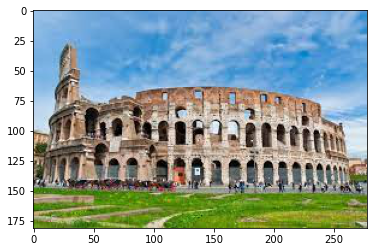

1/1 [==============================] - 1s 1s/step
[1.5177962e-07 4.6927905e-20 9.2498017e-14 1.3315883e-05 9.9998653e-01]
Sunny


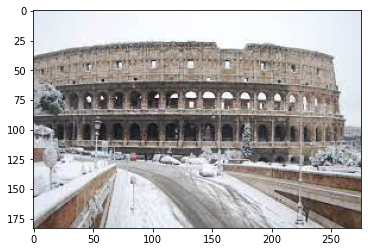

1/1 [==============================] - 0s 254ms/step
[3.6978474e-04 2.7271100e-12 1.5788830e-06 9.8955148e-01 1.0077160e-02]
Snowy


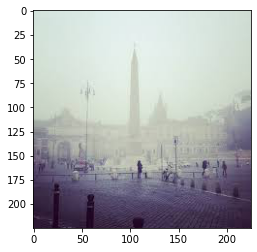

1/1 [==============================] - 0s 210ms/step
[1.5200152e-04 6.6475235e-02 1.9113706e-04 9.3312550e-01 5.6072349e-05]
Snowy


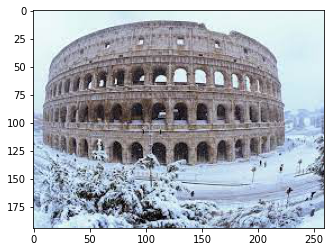

1/1 [==============================] - 0s 234ms/step
[1.2226478e-05 2.3965940e-09 2.5252273e-05 8.8565451e-01 1.1430793e-01]
Snowy


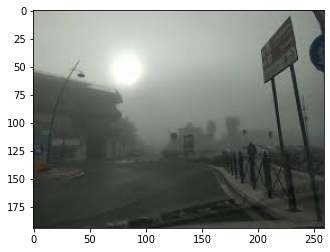

1/1 [==============================] - 0s 212ms/step
[0.6029545  0.02872905 0.36456823 0.00112173 0.0026265 ]
Cloudy


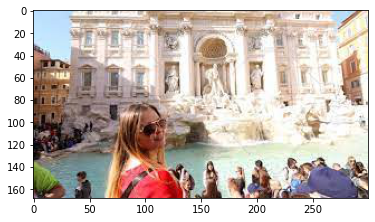

1/1 [==============================] - 0s 224ms/step
[6.0063656e-05 3.2548377e-16 4.8548156e-07 6.0299262e-02 9.3964022e-01]
Sunny


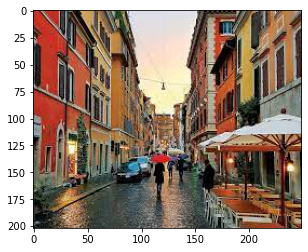

1/1 [==============================] - 0s 234ms/step
[7.0693678e-01 2.1847239e-15 5.8497750e-04 2.3173966e-02 2.6930434e-01]
Cloudy


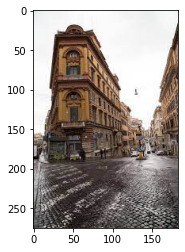

1/1 [==============================] - 0s 233ms/step
[1.0248075e-08 1.0481951e-21 2.1562768e-10 9.9998796e-01 1.1987335e-05]
Snowy


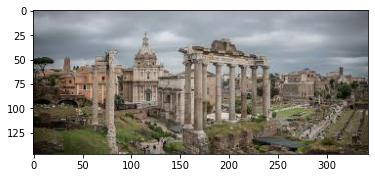

1/1 [==============================] - 0s 238ms/step
[1.12204306e-01 3.16766974e-10 9.06964415e-05 9.56936404e-02
 7.92011321e-01]
Sunny


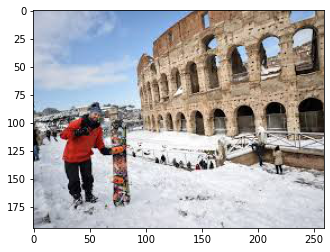

1/1 [==============================] - 0s 247ms/step
[6.1160526e-06 5.1138571e-14 3.6562469e-06 5.1921123e-04 9.9947101e-01]
Sunny


In [11]:
new_data=r"C:\Users\Sujan H G\OneDrive\Desktop\data science\Rome Weather\eval"


for i in os.listdir(new_data):
    img=image.load_img(os.path.join(new_data,i))
    plt.imshow(img)
    plt.show()
    x=image.img_to_array(img)
    
    x=np.expand_dims(x,axis=0)
    x=np.resize(x,(1,256,256,3)) 
    x=x/255
    images=np.vstack([x])
    
    val=model.predict(images)
    val=val.reshape(-1,)
    indeces=np.argmax(val)
    label=['Cloudy', 'Foggy', 'Rainy', 'Snowy', 'Sunny']
    print(val)
    print(label[indeces])
    

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       36992     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0